# Random Order- and SKU generators

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Random SKU table generation

### Objectives
Generate a table with unique SKUs that have randomly generated values. The number of records can be chosen by the user.

The initial table must contain at minimum the following columns:

| SKU ID | Category | Length | Width | Height | Weight |
| ---- | ---- | ---- | ---- | ---- | ---- |
| unique | nominal | continuous | continuous | continuous | continuous |

In [2]:
df_products = pd.read_excel('Product_list.xls')
df_products

,Category,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
0,Shirt,350,375,400,200,220,250,10,12,15
1,Pants,400,450,500,250,275,300,15,18,21
2,Socks,100,110,120,75,77,80,5,5,5
3,Box of cereals,250,250,250,150,150,150,10,10,10
4,Can of tuna,110,110,110,110,110,110,7,7,7
5,Bag of rice,540,540,540,350,350,350,250,250,250
6,Toolbox,600,600,600,380,380,380,350,350,350
7,Box of nails,150,150,150,120,120,120,80,80,80
8,Glue gun,380,380,380,80,80,80,80,80,80


In [3]:
df_products.set_index('Category', inplace=True)
df_products

,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
Category,,,,,,,,,
Shirt,350,375,400,200,220,250,10,12,15
Pants,400,450,500,250,275,300,15,18,21
Socks,100,110,120,75,77,80,5,5,5
Box of cereals,250,250,250,150,150,150,10,10,10
Can of tuna,110,110,110,110,110,110,7,7,7
Bag of rice,540,540,540,350,350,350,250,250,250
Toolbox,600,600,600,380,380,380,350,350,350
Box of nails,150,150,150,120,120,120,80,80,80
Glue gun,380,380,380,80,80,80,80,80,80


In [4]:
df_products.loc['Can of tuna']['Length_S']

110

In [15]:
def random_skus(articles, vertical):
    '''Function to generate a SKU table
    Inputs:
    - Number of desired SKUs
    - Market sector (vertical)
    Outputs:
    - SKU table'''
    
    random_dict = {}
    for i in range(1, articles + 1, 1):
        if vertical == 'Fashion':
            category = np.random.choice(['Shirt', 'Pants', 'Socks'])
            size = np.random.choice(['S', 'M', 'L'])
            length = abs(round(np.random.normal(df_products.loc[category]['Length_' + size], 10, 1)[0],0))
            width = abs(round(np.random.normal(df_products.loc[category]['Width_' + size], 7, 1)[0],0))
            height = abs(round(np.random.normal(df_products.loc[category]['Height_' + size], 5, 1)[0],0))
        elif vertical == 'Food':
            category = np.random.choice(['Box of cereals', 'Can of tuna', 'Bag of rice'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']
        else:
            category = np.random.choice(['Toolbox', 'Box of nails', 'Glue gun'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']

        size = np.random.choice(['S', 'M', 'L'])
        random_dict[i] = ['SKU_'+str(i), category, size, length, width, height]

    random_list = pd.DataFrame.from_dict(
        random_dict,
        orient='index',
        columns=[
            'SKU',
            'Category',
            'Size',
            'Length',
            'Width',
            'Height'])

    return random_list

In [6]:
df_skus_fashion = random_skus(1000, 'Fashion')

In [7]:
df_skus_fashion

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Shirt,S,390.0,261.0,19.0
2,SKU_2,Socks,S,116.0,79.0,6.0
3,SKU_3,Shirt,S,387.0,220.0,17.0
4,SKU_4,Pants,S,501.0,300.0,21.0
5,SKU_5,Pants,L,512.0,287.0,27.0
...,...,...,...,...,...,...
996,SKU_996,Shirt,M,381.0,258.0,13.0
997,SKU_997,Socks,M,129.0,70.0,4.0
998,SKU_998,Pants,L,514.0,290.0,28.0
999,SKU_999,Pants,S,404.0,247.0,22.0


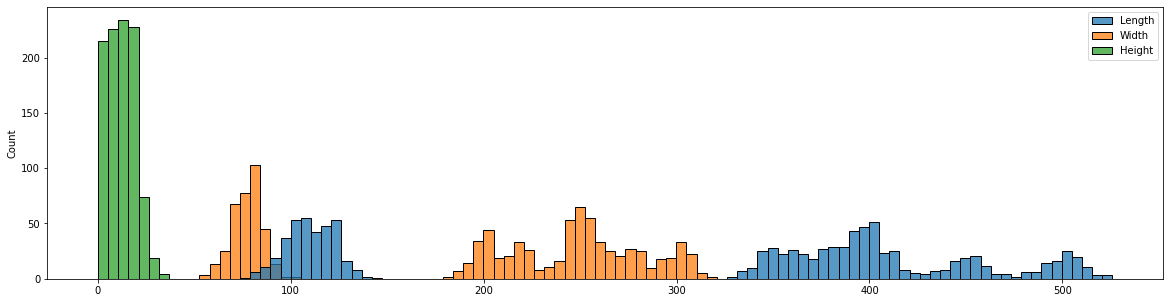

In [8]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_fashion[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


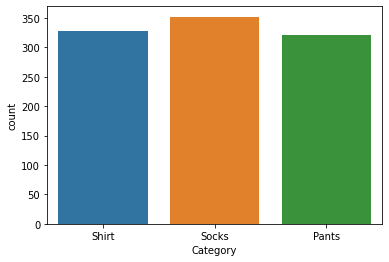

In [9]:
sns.countplot(df_skus_fashion['Category']);

In [10]:
df_skus_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       1000 non-null   object 
 1   Category  1000 non-null   object 
 2   Size      1000 non-null   object 
 3   Length    1000 non-null   float64
 4   Width     1000 non-null   float64
 5   Height    1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 87.0+ KB


In [11]:
df_skus_fashion.describe()

,Length,Width,Height
count,1000.000000,1000.000000,1000.000000
mean,304.885000,188.287000,12.013000
std,149.478043,86.288089,7.123733
min,75.000000,56.000000,0.000000
25%,118.000000,82.000000,6.000000
50%,370.500000,217.000000,12.000000
75%,407.000000,256.000000,17.000000
max,526.000000,320.000000,34.000000


In [12]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Box of cereals,M,250,150,10
2,SKU_2,Bag of rice,S,540,350,250
3,SKU_3,Can of tuna,M,110,110,7
4,SKU_4,Can of tuna,M,110,110,7
5,SKU_5,Can of tuna,M,110,110,7
...,...,...,...,...,...,...
996,SKU_996,Box of cereals,M,250,150,10
997,SKU_997,Bag of rice,S,540,350,250
998,SKU_998,Bag of rice,M,540,350,250
999,SKU_999,Box of cereals,M,250,150,10


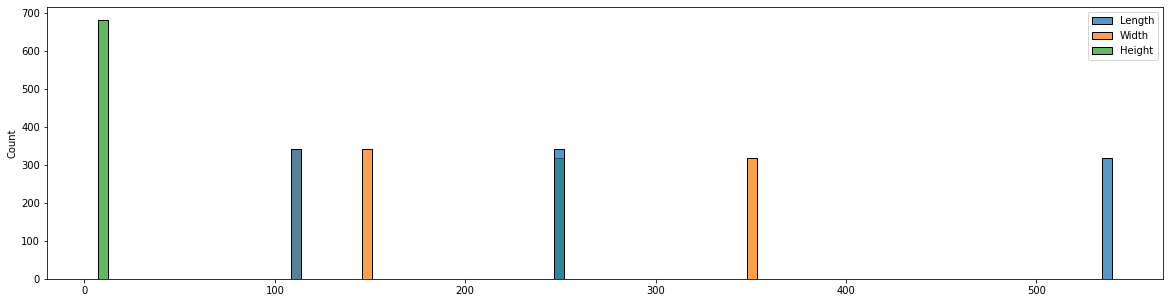

In [13]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


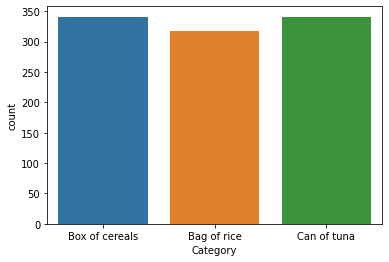

In [14]:
sns.countplot(df_skus_food['Category']);

### Notes
At this stage, the produced values are only to showcase the functionality and are not representative of real world data.
At a later time, more realistic data needs to be produced.

## Random order table generator

### Objectives
The goal is to create a function that generates a table of random orders. The order profile (units per order line, order lines per order) as well as the volume distribution of the SKUs (Pareto principle) must represent a real live scenario and must be selectable by the user.

The initial table must contain at minimum the following columns:

| Date | Order ID | SKU ID | Quantity | Order category |
| ---- | ---- | ---- | ---- | ---- |
| discrete | nominal | nominal | discrete | categorical |